#Mario Machine Learning Program#

This is a project where Karolina and Joanne are going to work together to make a program that can detect whether the character image inputted is Mario or not

##Converting the images into arrays##

In [11]:
import numpy as np
import random
from sklearn import svm
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

images = []
categories = ['mario', 'luigi']
data = []

for category in categories:
    label = categories.index(category)

    for i in range(1, 21): #hard coded - will need some other method to solve it
        img_read = io.imread("images/"+category+str(i)+".png", as_gray=True)
        img_resize = resize(img_read, (50,50))
        img = np.array(img_resize).flatten()
        data.append([img, label])


##Learning##

In [12]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

clf = svm.SVC(gamma=0.001, C=100.)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

clf.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

##Predictions##

###Prediction 1: Using test_mario.png###

The character of this image is: mario


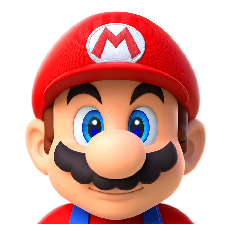

In [13]:
import matplotlib.pyplot as plt

test_mario = io.imread("images/test_mario1.png")
plt.axis('off')
plt.imshow(test_mario, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this image is: mario")

In [14]:
test_mario_img_read = io.imread("images/test_mario1.png", as_gray=True)
test_mario_img_resize = resize(test_mario_img_read, (50,50))
test_mario_img = np.array(test_mario_img_resize).flatten()

prediction_value = clf.predict([test_mario_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

The predicted character is: mario


###Prediction 2: Using test_luigi1.png###

The character of this image is: luigi


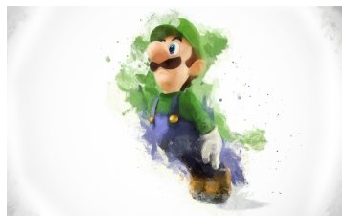

In [15]:
test_luigi = io.imread("images/test_luigi1.png")
plt.axis('off')
plt.imshow(test_luigi, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this image is: luigi")

In [16]:
test_luigi_img_read = io.imread("images/test_luigi1.png", as_gray=True)
test_luigi_img_resize = resize(test_luigi_img_read, (50,50))
test_luigi_img = np.array(test_luigi_img_resize).flatten()

prediction_value = clf.predict([test_luigi_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

The predicted character is: luigi


##Accuracy##

In [17]:
accuracy = round(clf.score(x_test, y_test), 3) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 50.0 %
